### Added 10% of duplicates 

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import duplicates_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

duplicates_utils.drop_negative_age(df)

## Adding duplicates

In [2]:
print('--------------------------------------')
duplicates_utils.print_duplicates_values(df) 

print(f'\nADDING 10% TO FEATURE \n')

df = duplicates_utils.replace_duplicates_values(df, 10)
duplicates_utils.print_duplicates_values(df)

--------------------------------------
Number of rows:  9984
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0

ADDING 10% TO FEATURE 

Number of rows:  9984
Duplicate Counts:  998
Percentage of Duplicate Values:  9.995993589743591


## Decision Tree

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3466
           1       0.97      0.99      0.98      3522

    accuracy                           0.98      6988
   macro avg       0.98      0.98      0.98      6988
weighted avg       0.98      0.98      0.98      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1526
           1       0.93      0.99      0.96      1470

    accuracy                           0.96      2996
   macro avg       0.96      0.96      0.96      2996
weighted avg       0.96      0.96      0.96      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4999
           1       0.96      0.99      0.97      4985

    accuracy                           0.97      9984


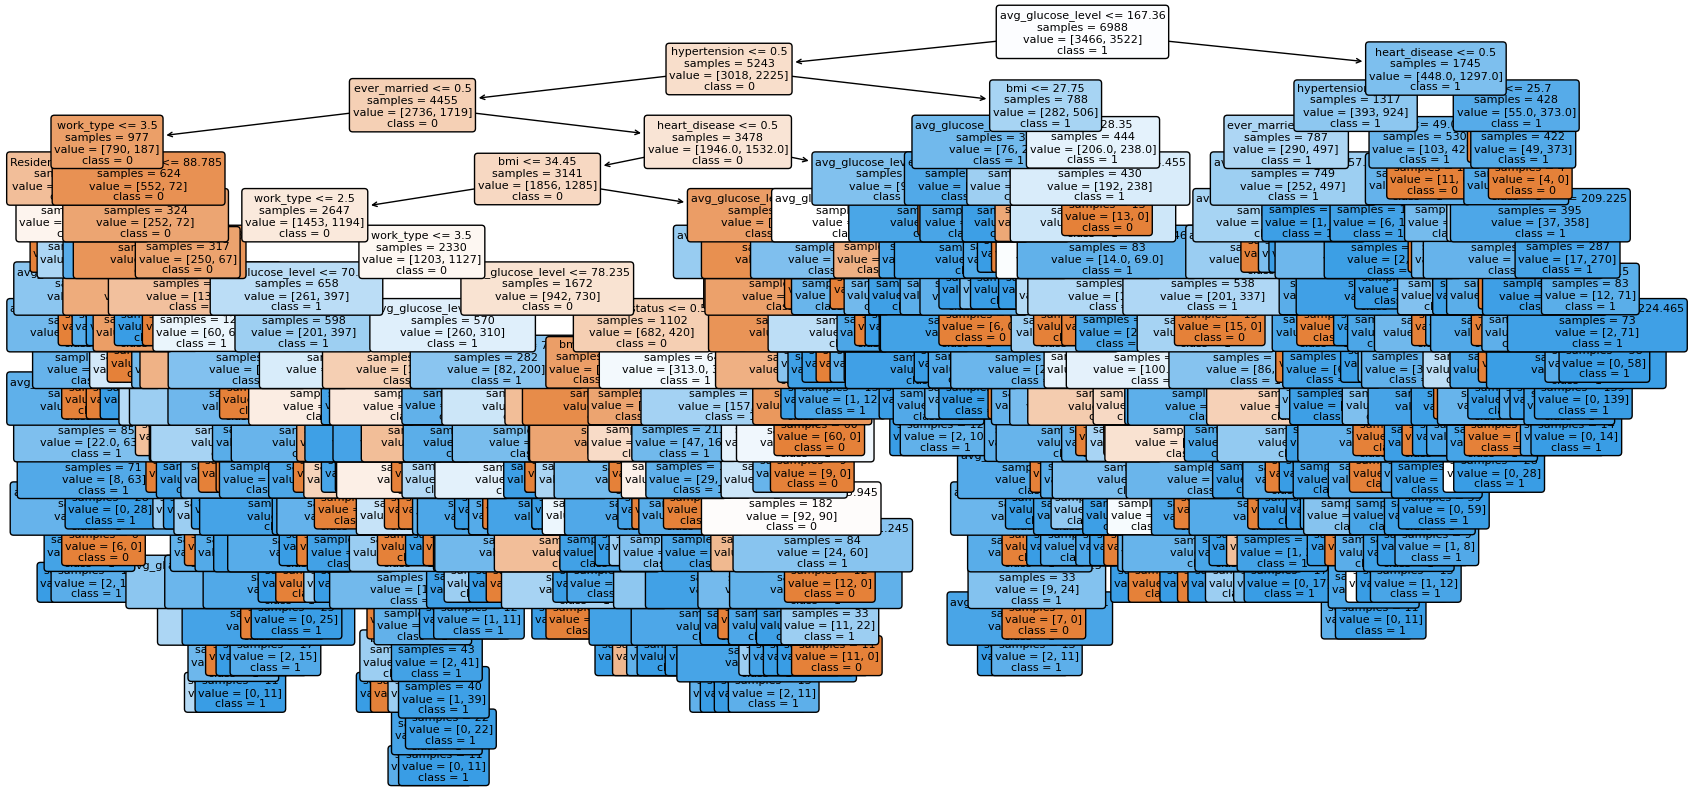

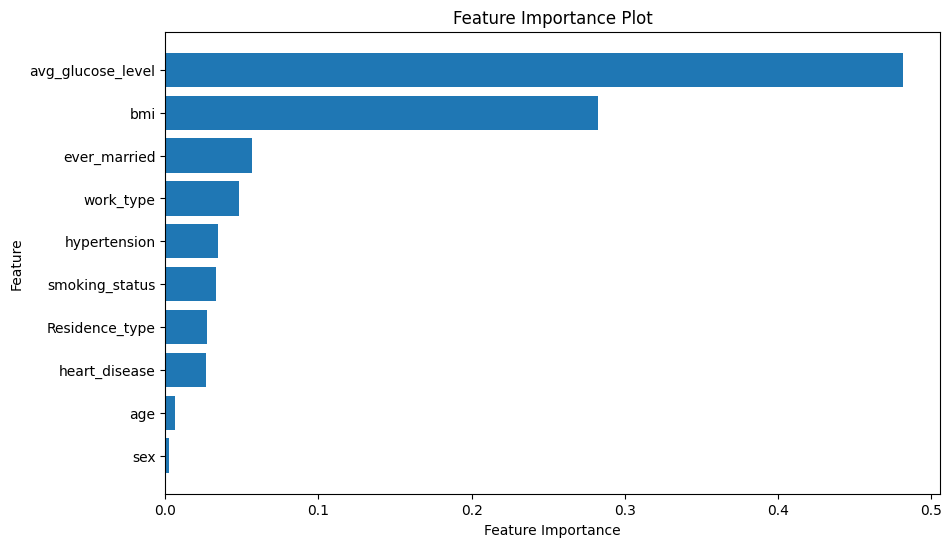

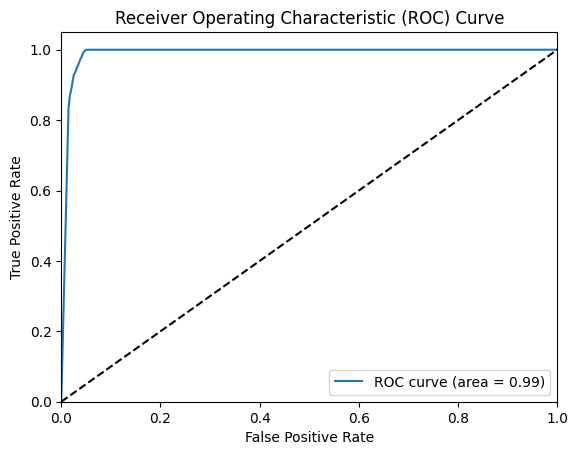

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9894812663636037
Accuracy for each fold: [0.949928469241774, 0.9542203147353362, 0.9527896995708155, 0.9656652360515021, 0.9728183118741058, 0.9785407725321889, 0.9628040057224606, 0.9670958512160229, 0.9727793696275072, 0.9584527220630372]
Mean accuracy: 0.963509475263475
95% confidence interval: (0.9566490532069507, 0.9703698973199992)


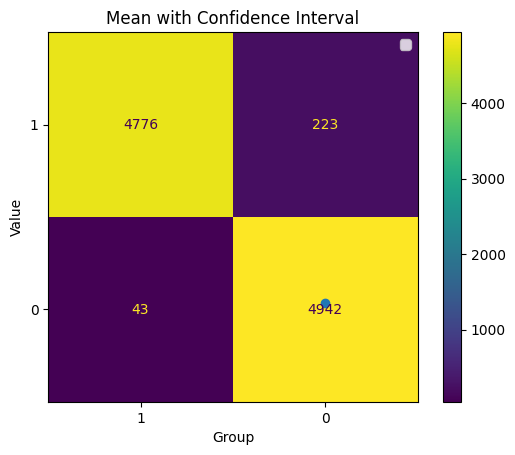

In [3]:
decision_tree = ML_algorithms.train_decision_tree_model(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df)

## Hist Gradient Boosting Classifier

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 47.58016562461853
Best parameters found:  {'l2_regularization': 0.2, 'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 353, 'min_samples_leaf': 1}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3466
           1       1.00      1.00      1.00      3522

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1526
           1       0.97      1.00      0.99      1470

    accuracy                           0.99      2996
   macro avg       0.99      0.99      0.99      2996
weighted avg       0.99      0.99      0.99      2996



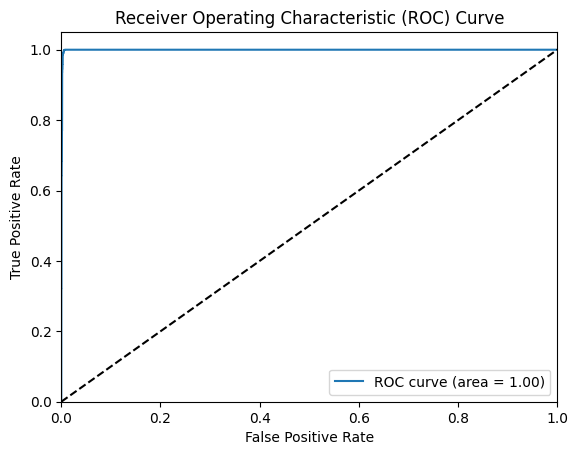

AUC Score: 0.9991958271293175


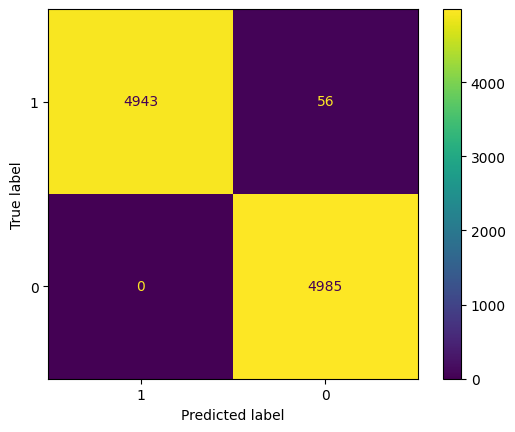

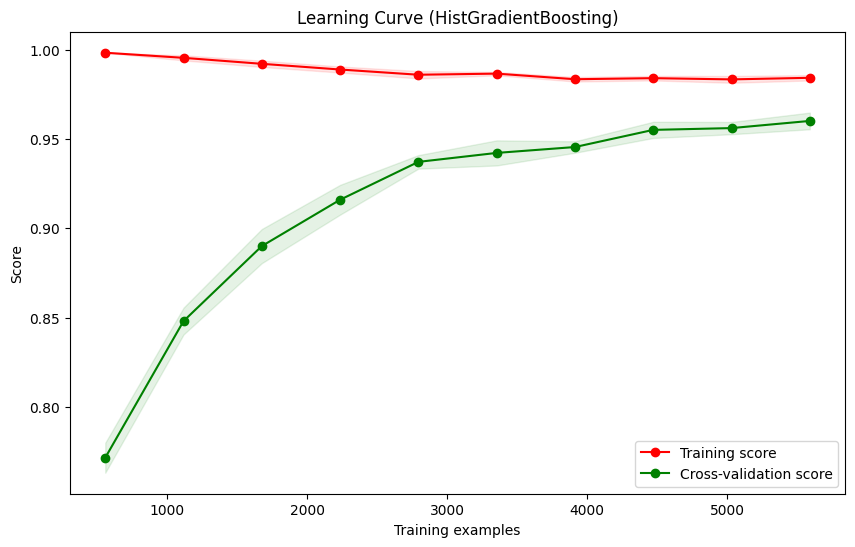

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9828326180257511, 0.9928469241773963, 0.9814020028612304, 0.9971387696709585, 0.9899856938483548, 0.994277539341917, 0.9828326180257511, 0.9828326180257511, 0.9871060171919771, 0.995702005730659]
Mean accuracy: 0.9886956806899745
95% confidence interval: (0.9843687094077528, 0.9930226519721962)


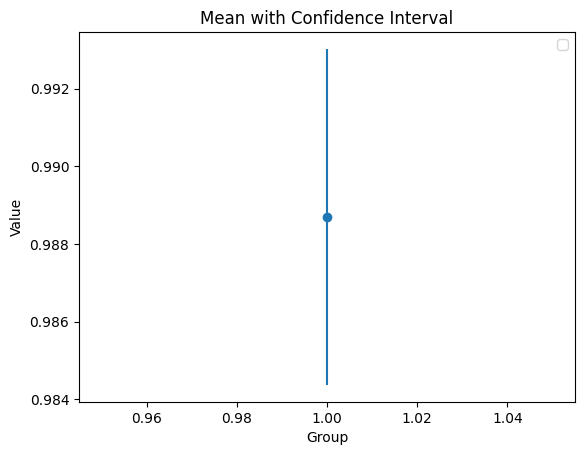

--------------------------------------


In [4]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

print('--------------------------------------')